In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# Ignore Warnings 
import warnings         
warnings.filterwarnings("ignore")

In [21]:
# Set the style of seaborn
sns.set(style="whitegrid") 

### EDA: Understanding the Dataset 

Shape, missing values, data types, overview etc

In [22]:
# loading the dataset 
loan_data_df = pd.read_csv("../data/loan_default_dataset_kenya.csv")

In [23]:
# Overview of the dataset 
loan_data_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,Loan_Amount,Loan_Term,Loan_Purpose,Credit_Score,Previous_Defaults,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,1803901,48,Business,643,0,1,0.62,37581.27,0,0
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,1419930,24,Medical,594,0,2,0.31,59163.75,1,1
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,1711066,48,Business,818,0,0,0.44,35647.21,1,0
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,1372954,36,Medical,834,1,1,0.41,38137.61,0,0
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,758970,36,Education,526,0,1,0.67,21082.50,0,1


In [24]:
# Cehcking the data types of the columns
loan_data_df.dtypes

Customer_ID              object
Age                       int64
Gender                   object
Marital_Status           object
Employment_Status        object
Education_Level          object
Number_of_Dependents      int64
Region                   object
Account_Tenure_Years      int64
Annual_Income             int64
Loan_Amount               int64
Loan_Term                 int64
Loan_Purpose             object
Credit_Score              int64
Previous_Defaults         int64
Existing_Loan_Count       int64
Debt_to_Income_Ratio    float64
Monthly_Installment     float64
Late_Payments_Count       int64
Default_Status            int64
dtype: object

In [25]:
# Checking for missing values in the dataset
loan_data_df.isnull().sum()

Customer_ID             0
Age                     0
Gender                  0
Marital_Status          0
Employment_Status       0
Education_Level         0
Number_of_Dependents    0
Region                  0
Account_Tenure_Years    0
Annual_Income           0
Loan_Amount             0
Loan_Term               0
Loan_Purpose            0
Credit_Score            0
Previous_Defaults       0
Existing_Loan_Count     0
Debt_to_Income_Ratio    0
Monthly_Installment     0
Late_Payments_Count     0
Default_Status          0
dtype: int64

In [26]:
# Checking the shape of the dataset
loan_data_df.shape

(500, 20)

In [27]:
# Checking the columns of the dataset
loan_data_df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Employment_Status',
       'Education_Level', 'Number_of_Dependents', 'Region',
       'Account_Tenure_Years', 'Annual_Income', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Credit_Score', 'Previous_Defaults',
       'Existing_Loan_Count', 'Debt_to_Income_Ratio', 'Monthly_Installment',
       'Late_Payments_Count', 'Default_Status'],
      dtype='object')

### Business Questions

1. Which customer segments have the highest default rates? - Segmentation by variables like employment status, education level, region, or age group.

2. How does the credit score impact the likelihood of loan default? - Is there a threshold below which default rates spike?

3. What is the relatinship between Debt-to-Income Ratio and loan default? - is there a critical DTI level that signals higher risks

4. Do existing loans or previous defaults significantly increase the risk of new defaults?

5. Which loan purposes are most commonly associated with loan defaults?

6. Can we build a predictinve mode to identify high-risk loan applicants before disbursements? - Using key variables like Credit Score, Income, and Loan Amount?

#### 1. Customers Segments - Education Level, Employment Status, Region, and Age Group

In [28]:
# We want to segment the customers into;
# 1. Education Level
# 2. Employment Status  
# 3. Region
# 4. Age Group 

# Default rate by education level
default_rate_by_education_level = loan_data_df.groupby("Education_Level").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False)

default_rate_by_education_level.columns = ['Education Level', 'Default Rate']

default_rate_by_education_level["Default Rate"] = default_rate_by_education_level["Default Rate"] * 100

In [29]:
# Default rate by employment status 
default_rate_by_employment_status = loan_data_df.groupby("Employment_Status").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False)

default_rate_by_employment_status.columns = ['Employment Status', 'Default Rate']

default_rate_by_employment_status["Default Rate"] = default_rate_by_employment_status["Default Rate"] * 100

In [30]:
# Default rate by region 
default_rate_by_region = loan_data_df.groupby("Region").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False) 

default_rate_by_region.columns = ['Region', 'Default Rate']

default_rate_by_region["Default Rate"] = default_rate_by_region["Default Rate"] * 100

In [31]:
# Default rate by age group 
# - We first create age groups
age_bins = [18, 25, 35, 45, 55, 65, 100] 

age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] 

loan_data_df["Age_Group"] = pd.cut(loan_data_df["Age"], bins=age_bins, labels=age_labels) 

default_rate_by_age_group = loan_data_df.groupby("Age_Group").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False) 

default_rate_by_age_group.columns = ['Age Group', 'Default Rate']

default_rate_by_age_group["Default Rate"] = default_rate_by_age_group["Default Rate"] * 100

In [32]:
# Default rate by income levels 
# - We first create income bands
income_bands = [100000, 400000, 800000, 1200000, 1600000, 2000000, 2400000, 2800000, 3200000, 3600000, 4000000, 4400000, 4800000, 5200000]

income_band_labels = ['0-400k', '400k-800k', '800k-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-2.4M', '2.4M-2.8M', '2.8M-3.2M', '3.2M-3.6M', '3.6M-4M', '4M-4.4M', '4.4M-4.8M', '4.8M-5.2M'] 

loan_data_df["Income_Band"] = pd.cut(loan_data_df["Annual_Income"], bins=income_bands, labels=income_band_labels) 

loan_default_by_income_band = loan_data_df.groupby("Income_Band").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False)

loan_default_by_income_band.columns = ['Income Band', 'Default Rate']

loan_default_by_income_band["Default Rate"] = loan_default_by_income_band["Default Rate"] * 100 

In [33]:
# Default rate by gender 

default_rate_by_gender = loan_data_df.groupby("Gender").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False) 

default_rate_by_gender.columns = ["Gender", "Default Rate"] 

default_rate_by_gender["Default Rate"] = default_rate_by_gender["Default Rate"] * 100

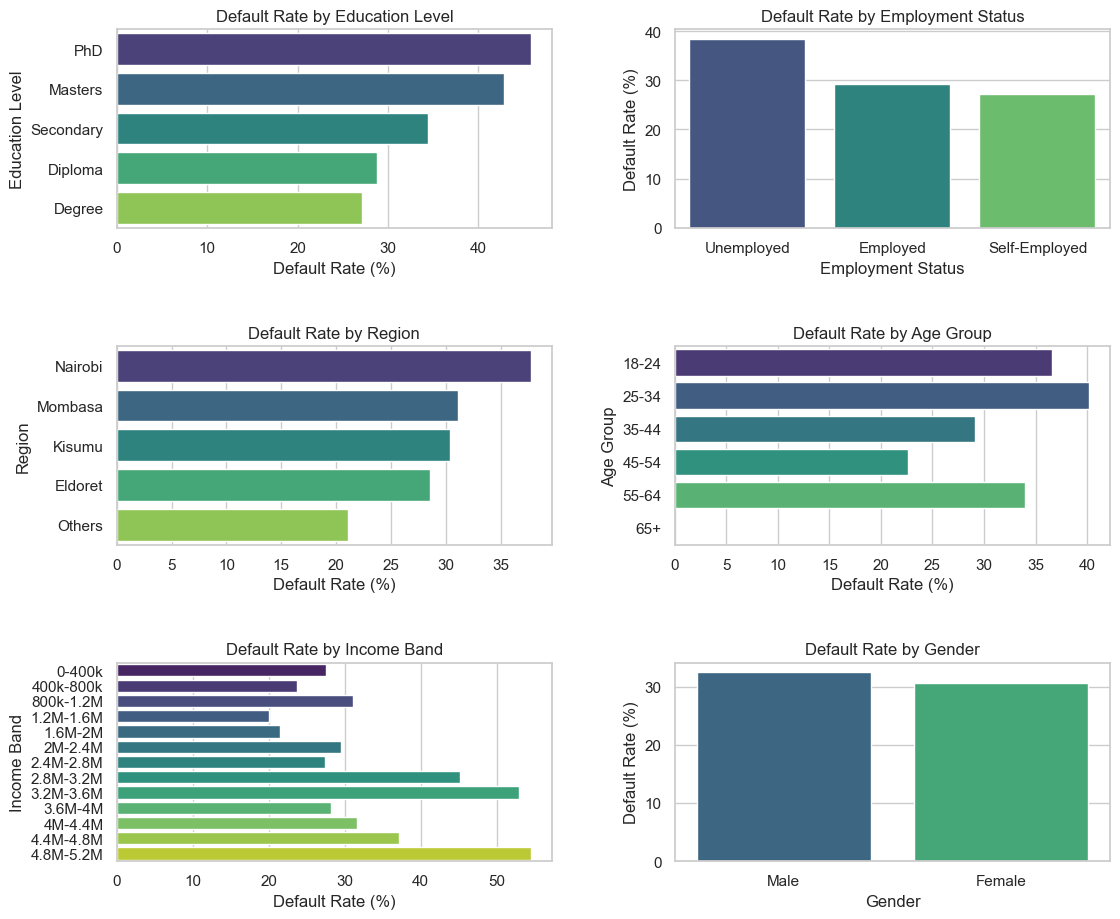

In [34]:
# Visualizing default rates by different segments

fig, ax = plt.subplots(3, 2, figsize=(12, 10))

# Default rate by education level
sns.barplot(default_rate_by_education_level, x="Default Rate", y="Education Level", palette="viridis", ax=ax[0,0])

ax[0,0].set_title("Default Rate by Education Level")  

ax[0,0].set_xlabel("Default Rate (%)") 


# Default rate by employment status
sns.barplot(default_rate_by_employment_status, x="Employment Status", y="Default Rate", palette="viridis", ax=ax[0,1])

ax[0,1].set_title("Default Rate by Employment Status")   

ax[0,1].set_ylabel("Default Rate (%)") 


# Default rate by region 
sns.barplot(default_rate_by_region, x="Default Rate", y="Region", palette="viridis", ax=ax[1,0])

ax[1,0].set_title("Default Rate by Region")

ax[1,0].set_xlabel("Default Rate (%)")


# Default rate by age group 
sns.barplot(default_rate_by_age_group, x="Default Rate", y="Age Group", palette="viridis", ax=ax[1,1])

ax[1,1].set_title("Default Rate by Age Group") 

ax[1,1].set_xlabel("Default Rate (%)")



# Default rate by income band 
sns.barplot(loan_default_by_income_band, x="Default Rate", y="Income Band", palette="viridis", ax=ax[2,0])

ax[2,0].set_title("Default Rate by Income Band")   

ax[2,0].set_xlabel("Default Rate (%)")



# Default rate by gender 
sns.barplot(default_rate_by_gender, x="Gender", y="Default Rate", palette="viridis", ax=ax[2,1])
ax[2,1].set_title("Default Rate by Gender") 
ax[2,1].set_ylabel("Default Rate (%)")

plt.tight_layout(pad=3.0) # Increasing padding space for the subplots


### Data Story | Key Findings

##### **Education Level**
- PhD's and masters holders have the highest default rate (approaching 40%)

- This insight is counterintuitive. It suggest that education level is not a major factor to protect against loan default or to be considered during risk assessment. This phenomenon may be explained as follows;
  1. **Over-Leveraging** - This occurrs when Ph.D's and Masters holders (or individuals with higher levels of education) take more debt than they can can reasonably pay. This may be caused by the fact that they have higher abilities hence qualify for larger loans, they expect high incomes because they have higher academic qualifications, and they may have other obligations such as education loans. Even though they are highly educated, they may have challenges making monthly loan repayments especially when the debt obligation is higher than the cashflow/income.

  2. **Mismatch Between Qualifications and Income Generation** - This means that, while someone may have a higher academic qualification, they may not be earning as much as expected. This me be as a result of;
        - **Underemployment**, that is, working a job that doesn't match skills or pay expectations. 
        - **Economic Constraints** which may result to delayed promotions or market saturation resulting to low demand.


##### **Employment Status**
- Unemployed borrowers have the highest default rate (approaching 40%). This rate is significantly higher compared to employed borrowers (approx 27%) and self-employed borrowers (approx 25%).

- This insight suggest that employment status is a major factor during risk assessment. For the loan products that target unemployed people, such offerings should be reconsidered or re-evaluated. 


##### **Region** 

- Borrowers from Nairobi Region have the highest default rate, followed closely by Mombasa with default rates approaching 40%. 

- This suggest that cities tend to have higher default rates. This may be as a result of high cost of living that may force people to borrow more (increase thier borrowing) compared to "Other" regions which may be considered to be outside cities. 

- It is important to consider Region during risk assessment and focus should be given to diversification of regions into "Other" regions to diversify the credit portfolion and reduce exposure. 


##### **Age Group**

- Young burrowers aged 18-34 years have higher default rates peaking at 39%. This may be attributed by the fact that this segment of borrowers is in thier early stages of thier career or entreprenuership journey. Therefore, they may lack stable and well-established financial management and planning skills. This segment comproses of university students, young profesisonals, or freelancers in the gig-economy. There income levels may be unreliable, sporadic, or low which may make it hard to meet montly installments in some cases. Therefore, they tend to be more financially vulnerable which may call for interventions like financial education, tight credit scoring, and strick financial verification.

- Older customers aged 45-54 years demonstrates lower default rates notably because they have more stable financial management and planning skills, they have established careers or business, or have conservative borrowing behavior. This segment already owns property like homes, land, and cars which may serve as collaterals for the loans reducing the percieved risk of default. As a result, their default rate is moderate-to-low. The bank should therefore focus on retaining this age group, cross-sell other products (e.g., mortgages, investment products), and up-sell higher ticket loans.

- Therefore, age is a critical factor during risk assessment. 


##### **Gender** 

- Both Male and Female borrowers tend to have a similar default rate. Whereas male borrowers depicts a slightly higher default rate, gender may not be a significant factor during risk assessment.


##### **Income**




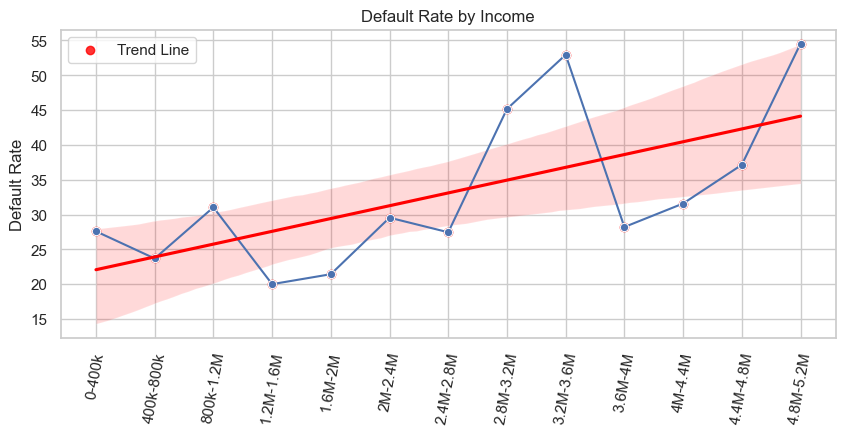

In [69]:
# A Further Demonstration of the default rate by income band using line plot further
plt.figure(figsize=(10, 4))
sns.set_theme(style="whitegrid")
sns.lineplot(loan_default_by_income_band, x="Income Band", y="Default Rate", marker="o")
plt.title("Default Rate by Income")

# Introducing a regression line to show the trend of default rate by income band
sns.regplot(loan_default_by_income_band, x=loan_default_by_income_band.index, y="Default Rate", marker="o", color="red", label="Trend Line")

# Rotate the x-axis labels for better visibility 
plt.xticks(rotation=80)
plt.legend()

##### **Key Insights**: Income vs. Default Rate

- Supprisingly, default rate increases as the income increases -- peaking at 2.8M - 3.6M. This suggests that higher income does not necessarlly indicate lower credit risk or lower potential to default. 

- This phenomenon may be contributed by, for example, lifestyle inflation, several debt obligations, and larger loan amounts. 

- That said, there is a huge opportunity to integrate debt-to-income ratio for strigent monitoring.